In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('transactions.csv')

In [3]:
# Basic info
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction_Amount    10000 non-null  float64
 1   Transaction_Type      10000 non-null  object 
 2   Account_Age           10000 non-null  int64  
 3   Transaction_Location  10000 non-null  object 
 4   Is_Fraud              10000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB
None
       Transaction_Amount   Account_Age      Is_Fraud
count        10000.000000  10000.000000  10000.000000
mean            50.529458      5.062500      0.025100
std             60.060368      2.559189      0.156437
min              0.000582      1.000000      0.000000
25%             14.163660      3.000000      0.000000
50%             34.161760      5.000000      0.000000
75%             67.882483      7.000000      0.000000
max           2031.596714      9.00

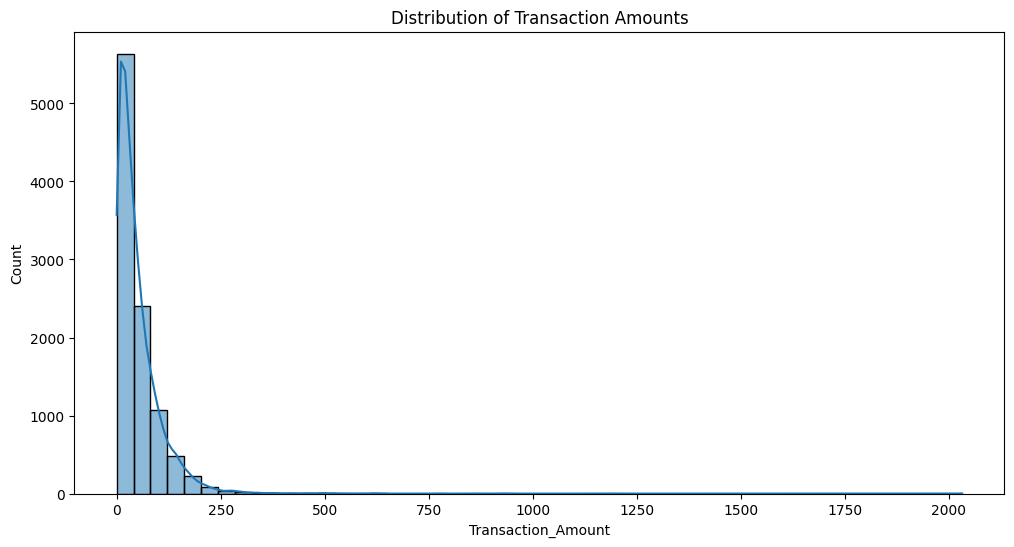

In [4]:
# Distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(data['Transaction_Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()


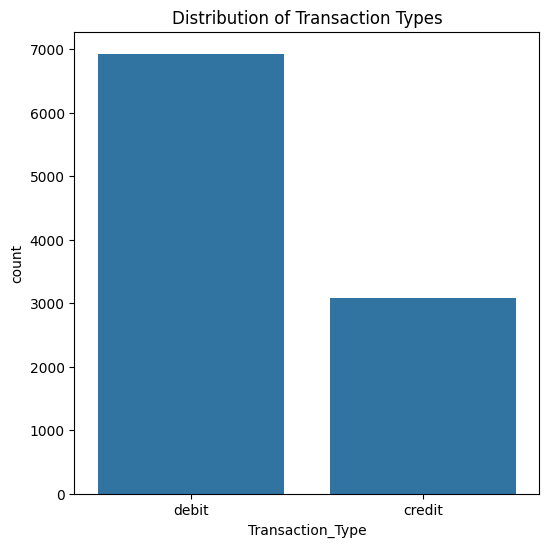

In [5]:
# Distribution of transaction types
plt.figure(figsize=(6, 6))
sns.countplot(x='Transaction_Type', data=data)
plt.title('Distribution of Transaction Types')
plt.show()


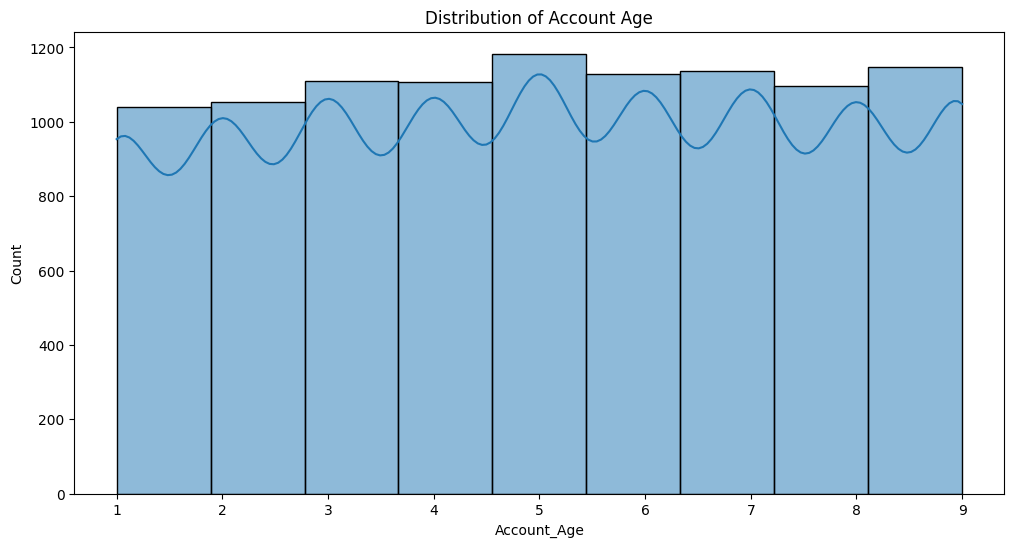

In [6]:
# Distribution of account age
plt.figure(figsize=(12, 6))
sns.histplot(data['Account_Age'], bins=9, kde=True)
plt.title('Distribution of Account Age')
plt.show()

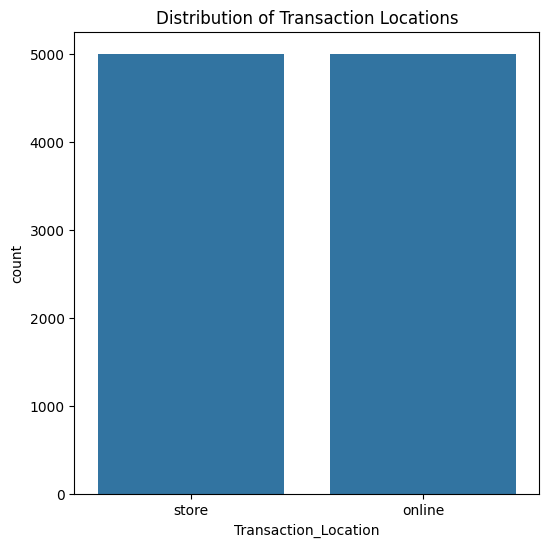

In [7]:
# Distribution of transaction locations
plt.figure(figsize=(6, 6))
sns.countplot(x='Transaction_Location', data=data)
plt.title('Distribution of Transaction Locations')
plt.show()


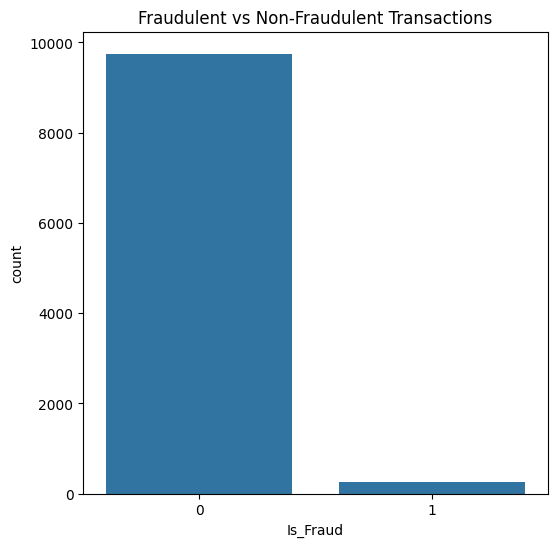

In [9]:
# Fraudulent vs non-fraudulent transactions
plt.figure(figsize=(6, 6))
sns.countplot(x='Is_Fraud', data=data)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()


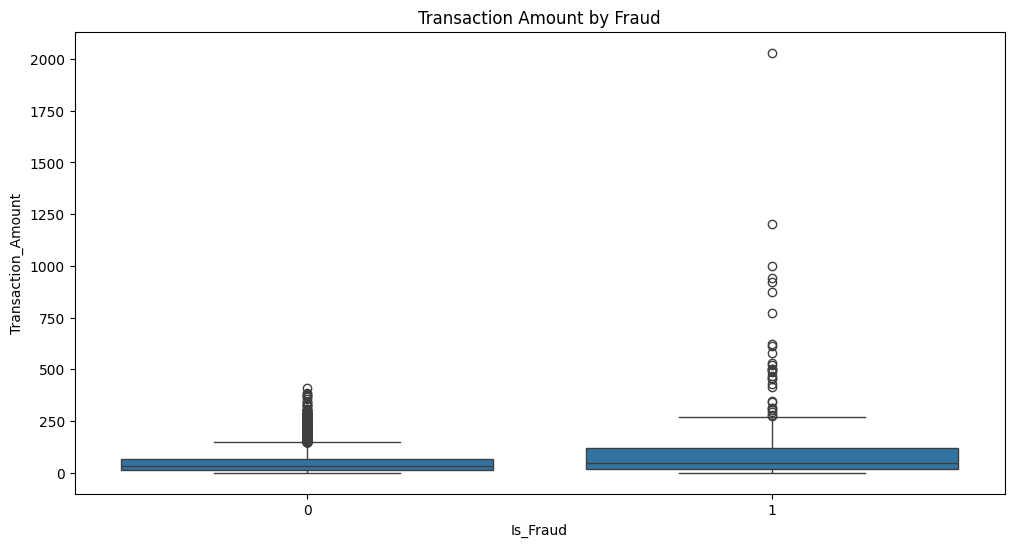

In [10]:
# Transaction amount by fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=data)
plt.title('Transaction Amount by Fraud')
plt.show()


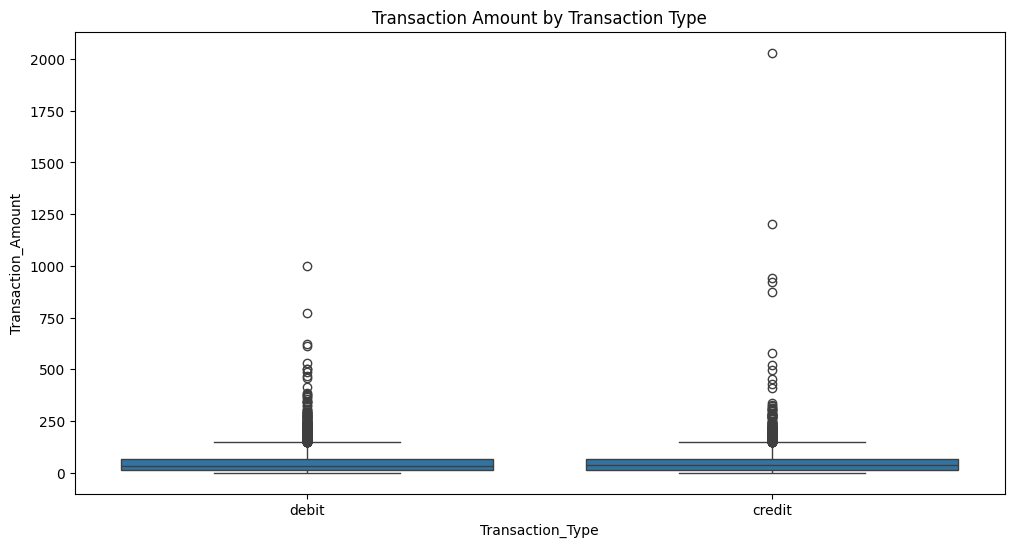

In [11]:
# Transaction amount by transaction type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transaction_Type', y='Transaction_Amount', data=data)
plt.title('Transaction Amount by Transaction Type')
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout, GRU
from tensorflow.keras.utils import to_categorical

# Load dataset
data = pd.read_csv('transactions.csv')

# Encode categorical features
le_type = LabelEncoder()
le_location = LabelEncoder()
data['Transaction_Type'] = le_type.fit_transform(data['Transaction_Type'])
data['Transaction_Location'] = le_location.fit_transform(data['Transaction_Location'])

# Scale numerical features
scaler = StandardScaler()
data[['Transaction_Amount', 'Account_Age']] = scaler.fit_transform(data[['Transaction_Amount', 'Account_Age']])

# Split data
X = data.drop('Is_Fraud', axis=1)
y = data['Is_Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Reshape for RNN and CNN
X_train_rnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# MLP Model
model_mlp = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 2s 3ms/step - loss: 0.2349 - accuracy: 0.9536 - val_loss: 0.1449 - val_accuracy: 0.9719
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.9767 - val_loss: 0.1357 - val_accuracy: 0.9719
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.9767 - val_loss: 0.1299 - val_accuracy: 0.9719
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1316 - accuracy: 0.9769 - val_loss: 0.1222 - val_accuracy: 0.9719
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9761 - val_loss: 0.1215 - val_accuracy: 0.9731
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9770 - val_loss: 0.1203 - val_accuracy: 0.9744
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1185 - accuracy: 0.9772 - val_loss: 0.1207 - val_accuracy: 0.9737
Epoch 

In [14]:
# RNN Model
model_rnn = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)),
    LSTM(50),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 6s 12ms/step - loss: 0.1935 - accuracy: 0.9720 - val_loss: 0.1242 - val_accuracy: 0.9719
Epoch 2/50
200/200 [==============================] - 2s 11ms/step - loss: 0.1073 - accuracy: 0.9777 - val_loss: 0.1218 - val_accuracy: 0.9744
Epoch 3/50
200/200 [==============================] - 2s 11ms/step - loss: 0.1066 - accuracy: 0.9777 - val_loss: 0.1185 - val_accuracy: 0.9737
Epoch 4/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1061 - accuracy: 0.9773 - val_loss: 0.1189 - val_accuracy: 0.9744
Epoch 5/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1053 - accuracy: 0.9781 - val_loss: 0.1189 - val_accuracy: 0.9744
Epoch 6/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1059 - accuracy: 0.9780 - val_loss: 0.1190 - val_accuracy: 0.9744
Epoch 7/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1058 - accuracy: 0.9778 - val_loss: 0.1181 - val_accuracy: 0.9744
Epo

In [17]:
# Evaluate models
mlp_loss, mlp_accuracy = model_mlp.evaluate(X_test, y_test)
rnn_loss, rnn_accuracy = model_rnn.evaluate(X_test_rnn, y_test)


print(f'MLP - Loss: {mlp_loss}, Accuracy: {mlp_accuracy}')
print(f'RNN - Loss: {rnn_loss}, Accuracy: {rnn_accuracy}')


63/63 [==============================] - 1s 7ms/step - loss: 0.1152 - accuracy: 0.9745
MLP - Loss: 0.11742842197418213, Accuracy: 0.9725000262260437
RNN - Loss: 0.11518736928701401, Accuracy: 0.9745000004768372
